# Python for Data Analysis


######**YUNIFAR SETYO R**
**552357**

## Course Content
1. Python packages for data scientists
2. Data manipulation with Pandas
3. Basic data plotting
4. Descriptive statistics
5. Inferential statistics


## Python packages for data scientists
- [NumPy](https://numpy.org)
    - Introduces objects for handling n-dimensional arrays such as vectors (1-D) and matrices (2-D).
    - Introduces functions to perform advanced mathematical and statistical operations on these objects.
    - Provides vectorization of mathematical operations on arrays and matrices which significantly improves performance.
    - Many other Python libraries are built on NumPy
- [SciPy](https://scipy.org)
    - An enormous collection of algorithms for statistics, linear algebra, optimization, differential equations, numerical integration, and more.
    - Developed and released with Numpy.
- [Pandas](https://pandas.pydata.org)
    - Adds data structures and tools designed to work with table-like data (similar to Vectors and Data Frames in R)
    - Provides tools for data maniuplation: *reshaping*, *merging*, *sorting*, *slicing*, *aggregation*, etc.
    - Easily allows to handle missing data
      
- [SciKit-Learn](https://scikit-learn.org/stable/)
    - Provides machine learning algorithms: classification, regression, clustering, model validation, etc.
    - Built on NumPy, Scipy, and matplotlib.

- Machine Learning libraries
    - [Pytorch](https://pytorch.org/)
    - [Tensorflow](https://www.tensorflow.org/)
    - [Jax](https://github.com/jax-ml/jax)
    - For more info on using these on the SCC see [this page](https://www.bu.edu/tech/support/research/software-and-programming/common-languages/python/python-ml/).

- Pandas alternatives
  - Pandas is very popular and it has some alternatives
  - [Dask](https://www.dask.org/) - process large scale data in parallel, built on Pandas.
  - [Modin](https://github.com/modin-project/modin) - another library for scaling up Pandas to large datasets.
  - [Polars](https://pola.rs/) - Similar functionality (but not built on Pandas), fast, parallel processing, gaining in popularity.
    
### Visualization
More in-depth look at visualization in the `Data Visualization in Python` course.
- [matplotlib](https://matplotlib.org/)
    - Python 2-D plotting library for pulibcation quality figures in a variety of hardcopy formats
    - Functionalities similar to MATLAB
    - Line plots, scatter plots, bar charts, histograms, pie charts, etc.
    - Effort needed to create advanced visualizations
- [seaborn](https://seaborn.pydata.org/)
    - Based on matplotlib
    - Provides a high-level interface for drawing attractive statistical graphs
    - Similar to the ggplot2 library in R
- [plotly](https://plotly.com/python/)
    - over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
    - Built on top of the Plotly JavaScript library
    - Can create beautiful interactive web-based visualizations
- [Datashader](https://datashader.org/)
    - Used to create visualizations and plots from very large datasets.

## Loading Python libraries

In [1]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
The main focus of this tutorial is using the Pandas library to manipulate and analyze data.

Pandas is a python package that deals mostly with :
- **Series**  (1-D homogeneous array)
    - the array has 1 data type (int, floating point, etc)
- **DataFrame** (2-D labeled heterogeneous array)
    - each column has a specific data type
- **MultiIndex** (for hierarchical data)
- **Xarray** (built on top of Pandas for n-D arrays)

The Pandas content of this tutorial will cover:
* Creating and understanding Series and DataFrames
* Importing/Reading data
* Data selection and filtering
* Data maniuplation via sorting, grouping, and rearranging
* Handling missing data


In addition we will also provide information on the following.
* Basic data plotting
* Descriptive statistics (time permitting)
* Inferential statistics (time permitting)

### Pandas Series

A Pandas *Series* is a 1-dimensional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc. ). It is a generalized numpy array with an explicit axis called the *index*.

In [2]:
# Example of creating Pandas series :
# Order all S1 together
s1 = pd.Series([-3, -1, 1, 3, 5])
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


![image.png](attachment:e141912c-cf3c-4599-a21b-4c3c3f2f6785.png)

We did not pass any index, so by default, it assigned the indexes ranging from `0`to `len(data)-1`. Contrast this with a Python list, which always has an implicit index that counts from 0:
```
x = [10,20,30]
y = x[1]  # y --> 20
```
and also with a Python dictionary, where the keys act as an index:
```
x = {'a':10, 'b':20, 'c':30}
y = x['b']  # y --> 20
```

In [3]:
# View index values
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [4]:
s1[:2] # First 2 elements

,0
0,-3
1,-1


In [5]:
print(s1[[2,1,0]])  # Elements out of order

2    1
1   -1
0   -3
dtype: int64


In [6]:
type(s1)

pandas.core.series.Series

In [7]:
# Can place filtering conditions on series
s1[s1 > 0]

,0
2,1
3,3
4,5


In [8]:
# Creating Pandas series with index:
# fetch a random number generator object.
rng = np.random.default_rng()
# select 5 points from a normal (Gaussian) distribution.
s2 = pd.Series(rng.normal(size=5), index=['a', 'b', 'c', 'd', 'e'])
print(s2)

a    1.741435
b   -1.221831
c    0.319629
d    0.321334
e   -0.029264
dtype: float64


In [9]:
# View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [10]:
# Create a Series from dictionary
data = {'pi': 3.14159, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series(data)
print(s3)

{'pi': 3.14159, 'e': 2.71828}
pi    3.14159
e     2.71828
dtype: float64


In [11]:
# Create a new series from a dictionary and reorder the elements
s4 = pd.Series(data, index=['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14159
tau        NaN
dtype: float64


NaN (Not a Number) - is used to specify a missing value in Pandas.

In [12]:
# Series can be treated as a 1-D array and you can apply functions to them:
print("Median:", s4.median())

Median: 2.929935


In [13]:
# Methods can be used to filter series:
s4[s4 > s4.median()]

,0
pi,3.14159


### Attributes and Methods:
An attribute is a variable stored in the object, e.g., index or size with Series.
A method is a function stored in the object, e.g., head() or median() with Series.

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

Execute *dir(s1)* to see all attributes and methods.

I recommend using online documentation as well. This will be in a much easier format to read and come with examples.



In [14]:
# For more information on a particular method or attribute use the help() function
help(s4.head())

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool | lib.NoDefault' = <no_default>) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scala

In [15]:
help(s4.index)

Help on Index in module pandas.core.indexes.base object:

class Index(pandas.core.base.IndexOpsMixin, pandas.core.base.PandasObject)
 |  Index(data=None, dtype=None, copy: 'bool' = False, name=None, tupleize_cols: 'bool' = True) -> 'Self'
 |  
 |  Immutable sequence used for indexing and alignment.
 |  
 |  The basic object storing axis labels for all pandas objects.
 |  
 |  .. versionchanged:: 2.0.0
 |  
 |     Index can hold all numpy numeric dtypes (except float16). Previously only
 |     int64/uint64/float64 dtypes were accepted.
 |  
 |  Parameters
 |  ----------
 |  data : array-like (1-dimensional)
 |  dtype : str, numpy.dtype, or ExtensionDtype, optional
 |      Data type for the output Index. If not specified, this will be
 |      inferred from `data`.
 |      See the :ref:`user guide <basics.dtypes>` for more usages.
 |  copy : bool, default False
 |      Copy input data.
 |  name : object
 |      Name to be stored in the index.
 |  tupleize_cols : bool (default: True)
 |   

In [16]:
# You can also add a question mark to get help information
s4.head?

In [17]:
s4.index?

Pandas Series can also [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) themselves:

<Axes: >

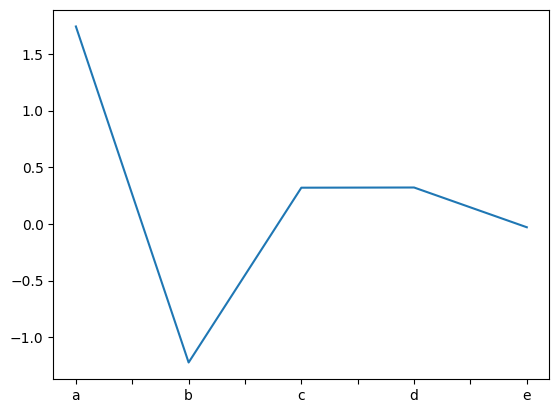

In [18]:
# Going back to s2
s2.plot()

One final way to get help is to press shift-tab when you are in the parentheses of a method or after an attribute. Try this in the exercise below.

### Exercise - Create your own Series

In [19]:
# Create a series with 10 elements containing both positive and negative integers
# Examine the series with the head() method
data = np.random.randint(-6,10,10)
index = range(10)
mys = pd.Series(data, index)
print(mys)

0   -1
1   -3
2    1
3    5
4    2
5    0
6    7
7   -2
8    4
9    0
dtype: int64


Series from Numpy or a Series. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series)

In [20]:
# create a Series from a numpy array
a=np.array(range(6))  # numbers 0 thru 5
print(f'numpy: {a}')
ser = pd.Series(a)
print(f'series:\n{ser}')
# Change an element of the numpy array
a[0] = -100
# Print the series again
print(f'numpy: {a}')
print(f'series:\n{ser}')

numpy: [0 1 2 3 4 5]
series:
0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64
numpy: [-100    1    2    3    4    5]
series:
0   -100
1      1
2      2
3      3
4      4
5      5
dtype: int64


In [21]:
# Tell pandas to make a copy of the numpy array.
ser2 = pd.Series(a, copy=True)
print(f'series2:\n{ser2}')
# change the array again
a[-1]=1000
# ser2 was built with a copy of "a", so no changes.
print(f'series2:\n{ser2}')

series2:
0   -100
1      1
2      2
3      3
4      4
5      5
dtype: int64
series2:
0   -100
1      1
2      2
3      3
4      4
5      5
dtype: int64


### Pandas DataFrames

A Pandas *DataFrame* is a 2-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns. You can think of it as a dictionary-like container to store Python Series objects.

In [22]:
d = pd.DataFrame({'Name': pd.Series(['Alice', 'Bob', 'Chris']),
                  'Age': pd.Series([21, 25, 23])})
print(d)

    Name  Age
0  Alice   21
1    Bob   25
2  Chris   23


In [23]:
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'], [21, 25, 23]]).T, columns=['Name','Age'])

In [24]:
# Use the head() method to print the first 5 records in the dataframe (same as with series)
d2.head()

,Name,Age
0,Alice,21
1,Bob,25
2,Chris,23


In [25]:
# Add a new column to d2:
d2['Height'] = pd.Series([5.2, 6.0, 5.6])
d2.head()

,Name,Age,Height
0,Alice,21,5.2
1,Bob,25,6.0
2,Chris,23,5.6


In [26]:
# Add your own index:
d3 = d2.copy()
d3['my_index'] = ['person1','person2','person3']
# assign the values in my_index as the new index
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
d3 = d3.set_index('my_index', drop=True) # remove my_index afterwards
d3

,Name,Age,Height
my_index,,,
person1,Alice,21,5.2
person2,Bob,25,6.0
person3,Chris,23,5.6


In [27]:
# If you don't like an index, you can remove it and reset it to the usual one 0...len(df)-1
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html#pandas.DataFrame.reset_index
d4 = d3.reset_index(drop=False)  # What do you get if drop=False?
d4

,my_index,Name,Age,Height
0,person1,Alice,21,5.2
1,person2,Bob,25,6.0
2,person3,Chris,23,5.6


In [28]:
# Combine dataframes. There's a bunch of ways. Here let's stack d2 onto d3:
#https://pandas.pydata.org/docs/reference/api/pandas.concat.html
d5 = pd.concat([d2,d4], axis=0)
d5
# See here for a discussion of a bunch of ways: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

,Name,Age,Height,my_index
0,Alice,21,5.2,NaN
1,Bob,25,6.0,NaN
2,Chris,23,5.6,NaN
0,Alice,21,5.2,person1
1,Bob,25,6.0,person2
2,Chris,23,5.6,person3


In [29]:
# The index has gotten weird...fix it.
d5 = d5.reset_index(drop=True)
d5 = d5.drop(index=[3,4,5])
d5 = d5.drop(columns=['my_index'])

d5

,Name,Age,Height
0,Alice,21,5.2
1,Bob,25,6.0
2,Chris,23,5.6


### Reading data using Pandas
You can read CSV (comma separated values) files using Pandas. The command shown below reads a CSV file into the Pandas dataframe df.

In [30]:
#Uplaoad Files Salaries
from google.colab import files

Salaries = files.upload()

Saving Salaries.csv to Salaries.csv


In [31]:
# Read a csv file into Pandas Dataframe
df = pd.read_csv("Salaries.csv")

The above command has many optional arguments that you can find in the Pandas documentation online.

You can also read many other formats, for instance:
* Excel - pd.read_excel('myfile.xlsx', sheet_name='Sheet1', index_col=None, na_values=['NA'])
* Stata - pd.read_stata('myfile.dta')
* SAS - pd.read_sas('myfile.sas7bdat')
* HDF - pd.read_hdf('myfile.h5', 'df')

Before we can perform any analysis on the data we need to


*   Check if the data is correctly imported
*   Check the types of each column
*   Determine how many missing values each column has

We can then carefully prepare the data:

*   Remove columns that are not needed in our analysis
*   Rename the columns (if necessary)
*   Possibly rearrange the columns to make it easier to work with them
*   Create new or modify existing columns (e.g., convert into different units) if necessary

In [32]:
# Display the first 10 records
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [33]:
# Display structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


### More details on DataFrame data types

|Pandas Type | Native Python Type | Description |
|------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).|
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs (see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta\[ns\]| N/A (but see the datetime module in Python’s standard library) | Values meant to hold time data. Look into these for time series experiments. |


### DataFrame attributes
|df.attribute | Description |
|-------------|-------------|
| dtypes | list the types of the columns |
| columns | list the column names |
| axes | list the row labels and column names |
| ndim | number of dimensions |
| size | number of elements |
| shape | return a tuple representung the dimensionality |
| values | numpy representation of the data |

### Dataframe methods
|df.method() | Description |
|-------------|-------------|
| head(\[n\]), tail(\[n\]) | first/last n rows |
| describe() | generate descriptive statistics (for numeric columns only) |
| max(), min() | return max/min values for all numeric columns |
| mean(), median() | return mean/median values for all numeric columns |
| std() | standard deviation |
| sample(\[n\]) | returns a random sample of n elements from the data frame |
| dropna() | drop all the records with missing values |

Sometimes the column names in the input file are too long or contain special characters. In such cases we rename them to make it easier to work with these columns.

In [34]:
# Let's create a copy of this dataframe with a new column names
# If we do not want to create a new data frame, we can add inplace=True argument
df_new =df.rename(columns={'sex': 'gender', 'phd': 'yearsAfterPhD', 'service': 'yearsOfService'})
df_new.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


### DataFrame Exploration

In [35]:
# Identify the type of df_new object
type(df_new)

pandas.core.frame.DataFrame

In [36]:
# Check the data type of the column "salary"
# We access columns using the brackets, e.g., df['column_name']
df_new['salary'].dtype

dtype('int64')

In [37]:
# If the column name has no spaces, complex symbols, and is not the name of an attribute/method
# you can use the syntax df.column_name
df_new.salary.dtype

dtype('int64')

In [38]:
# List the types of all columns
df_new.dtypes

,0
rank,object
discipline,object
yearsAfterPhD,int64
yearsOfService,int64
gender,object
salary,int64


In [39]:
# List the column names
df_new.columns

Index(['rank', 'discipline', 'yearsAfterPhD', 'yearsOfService', 'gender',
       'salary'],
      dtype='object')

In [40]:
# List the row labels and the column names
df_new.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'yearsAfterPhD', 'yearsOfService', 'gender',
        'salary'],
       dtype='object')]

In [41]:
# Number of rows and columns
df_new.shape

(78, 6)

In [42]:
# Total number of elements in the Data Frame (78 x 6)
df_new.size

468

In [43]:
# Output some descriptive statistics for the numeric columns
# On a large dataframe this can take a long time to calculate
df_new.describe()

,yearsAfterPhD,yearsOfService,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [44]:
# Remember we can use the ? to get help about the function
df_new.describe?

#### Adding columns

Here's two ways to add a column:

In [45]:
# Create a new column using the assign method
# temporarily make a copy for demonstration purposes.
df_copy = df_new.copy()

# vectorized computation. This syntax is used to MODIFY a dataframe to
# contain a new column.
df_copy['salary_k'] = df_copy['salary'] / 1000.0
df_copy.head(10)

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800
5,Prof,A,20,20,Male,122400,122.400
6,AssocProf,A,20,17,Male,81285,81.285
7,Prof,A,18,18,Male,126300,126.300
8,Prof,A,29,19,Male,94350,94.350
9,Prof,A,51,51,Male,57800,57.800


In [46]:
# Create a new column using the assign method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html
# Assign returns a copy of df_new with a new column attached. df_copy2 is a brand new dataframe.
df_copy2 = df_new.assign(salary_k=df_new['salary']/1000.0)
df_copy2.head(10)

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800
5,Prof,A,20,20,Male,122400,122.400
6,AssocProf,A,20,17,Male,81285,81.285
7,Prof,A,18,18,Male,126300,126.300
8,Prof,A,29,19,Male,94350,94.350
9,Prof,A,51,51,Male,57800,57.800


In [47]:
# Check how many unique values are in a column
# There is a rank attribute in DataFrame object so we access using df['rank']
df_new['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

In [48]:
# Get the frequency table for a categorical or binary column
df_new['rank'].value_counts()

,count
rank,
Prof,46
AsstProf,19
AssocProf,13


In [49]:
# Get a proportion table
df_new['rank'].value_counts()/sum(df['rank'].value_counts())

,count
rank,
Prof,0.589744
AsstProf,0.243590
AssocProf,0.166667


In [50]:
# Alternatively we can use the pandas function crosstab() to calculate a frequency table
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
pd.crosstab(index=df_new['rank'], columns="count")

col_0,count
rank,
AssocProf,13
AsstProf,19
Prof,46


In [51]:
# Two-way tables
pd.crosstab(index=df_new['rank'], columns=df_new['discipline'], margins=True)

discipline,A,B,All
rank,,,
AssocProf,5,8,13
AsstProf,8,11,19
Prof,23,23,46
All,36,42,78


### Data slicing and grouping

In [52]:
#Extract a column by name
df_new['gender'].head()

,gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [53]:
# If the column name does not contain spaces or other special characters and does not collide with data frame methods, we can use a dot notation
df_new.gender.head()

,gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [54]:
# Calculate median number of service years
df_new.yearsOfService.median()

14.5

### Exercise - Working with a single column

In [55]:
# Calculate the descriptive statistics for only the salary column in df_new
df_new["salary"].describe()

,salary
count,78.000000
mean,108023.782051
std,28293.661022
min,57800.000000
25%,88612.500000
50%,104671.000000
75%,126774.750000
max,186960.000000


In [56]:
# Get a count for each of the values in the salary column in df_new
a = df_new["salary"].value_counts()
b = df_new["salary"].value_counts(normalize=True) * 100 #dalam bentuk %
a

,count
salary,
92000,3
77500,2
72500,2
91000,2
62884,1
...,...
99418,1
91100,1
85000,1


In [57]:
# Calculate the average (mean) salary in df_new
average_salary = df_new["salary"].mean()
print(average_salary)

108023.78205128205


### Grouping data

In [58]:
# Group data using rank
df_rank = df_new.groupby('rank')
df_rank.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
6,AssocProf,A,20,17,Male,81285
12,AsstProf,B,1,0,Male,88000
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
20,AsstProf,B,4,4,Male,92000


In [59]:
# Calculate mean of all numeric columns for the grouped object
df_rank.mean(numeric_only=True)


,yearsAfterPhD,yearsOfService,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [60]:
# What happens with df_rank.mean()
df_rank.mean() #error karena terdapat string

TypeError: agg function failed [how->mean,dtype->object]

In [61]:
# Most of the time, the "grouping" object is not stored, but is used as a step in getting a summary:
#   df_new.groupby('gender')
# Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df_new.groupby('gender')['salary'].mean()

,salary
gender,
Female,101002.410256
Male,115045.153846


In [62]:
# If we use double brackets Pandas will produce a DataFrame
df_new.groupby('gender')[['salary']].mean()

,salary
gender,
Female,101002.410256
Male,115045.153846


In [63]:
# Group using 2 variables - gender and rank:
df_new.groupby(['rank','gender'], sort=True)[['salary']].mean()

salary
rank      gender               
AssocProf Female   88512.800000
          Male    102697.666667
AsstProf  Female   78049.909091
          Male     85918.000000
Prof      Female  121967.611111
          Male    124690.142857

### Exercise - Grouping data

In [64]:
# Group data by the rank and discipline and find the average yearsOfService and salary_k for each group.
df_copy.groupby(["rank", "discipline"])[["yearsOfService", "salary_k"]].mean()

yearsOfService    salary_k
rank      discipline                            
AssocProf A                15.800000   73.959800
          B                 8.500000  102.927750
AsstProf  A                 2.125000   74.450000
          B                 2.272727   86.390273
Prof      A                20.434783  111.935696
          B                22.391304  135.313913

In [65]:
#menampilkan df_new sebelum ditambahkan kolom salary_k
df_new.groupby(["rank", "discipline"])[["yearsOfService", "salary"]].mean()

yearsOfService         salary
rank      discipline                               
AssocProf A                15.800000   73959.800000
          B                 8.500000  102927.750000
AsstProf  A                 2.125000   74450.000000
          B                 2.272727   86390.272727
Prof      A                20.434783  111935.695652
          B                22.391304  135313.913043

### Filtering

In [66]:
# Select observation with the value in the salary column > 120K
df_filter = df_new[df_new.salary > 120000]
df_filter.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [67]:
df_filter.axes

[Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39, 40,
        44, 45, 49, 51, 58, 72, 75],
       dtype='int64'),
 Index(['rank', 'discipline', 'yearsAfterPhD', 'yearsOfService', 'gender',
        'salary'],
       dtype='object')]

In [68]:
# Select data for female professors
df_w = df_new[df_new.gender == 'Female']
df_w.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


In [69]:
# To subset one column using a condition in another columns use method "where"
df_new.salary.where(df_new.gender=='Female').dropna().head(6)

,salary
39,129000.0
40,137000.0
41,74830.0
42,80225.0
43,77000.0
44,151768.0


### Exercise - Filtering data

In [70]:
# Using filtering, find the mean value of the salary for the discipline A
df_filter = df_new[df_new.discipline == 'A']
df_filter.salary.mean()

98331.11111111111

In [71]:
# Challenge:
# Determine how many female and male professors earned more than 100K
df_filter2 = df_new[df_new.salary > 100000] #menampilkan yang salary >100K
df_filter2.gender.value_counts() #menampilkan gener

,count
gender,
Male,25
Female,21


### Slicing a dataframe

In [72]:
# Select column salary
salary = df_new['salary']

In [73]:
# Check data type of the result
type(salary)

pandas.core.series.Series

In [74]:
# Look at the first few elements of the output
salary.head()

,salary
0,186960
1,93000
2,110515
3,131205
4,104800


In [75]:
# Select column salary and make the output to be a data frame
df_salary = df_new[['salary']]

In [76]:
# Check the type
type(df_salary)

pandas.core.frame.DataFrame

In [77]:
# Select a subset of rows (based on their position):
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df_new[0:10]

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [78]:
# If we want to select both rows and columns we can use method .loc
df_new.loc[10:20, ['rank', 'gender','salary']]

,rank,gender,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [79]:
# Recall our filtered dataset with salaries over 120K
df_filter3 = df_new[df_new.salary > 120000]#membuat data set dengansalaries lebih dari 120K
df_filter3.head(25)

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
19,Prof,A,29,27,Male,150500


In [80]:
# Let's see what we get for our df_filter data frame
# Method .loc subsets the data frame based on the index values:
# loc = location
df_filter.loc[10:20,['rank','gender','salary']]

,rank,gender,salary
18,Prof,Male,107300
19,Prof,Male,150500


In [81]:
# Unlike method .loc, method iloc selects rows (and columns) by absolute position:
# iloc = integer location
df_filter.iloc[10:20, [0,3,4,5]]

,rank,yearsOfService,gender,salary
21,Prof,30,Male,103106
22,AsstProf,2,Male,73000
23,AsstProf,0,Male,85000
24,Prof,23,Male,91100
26,Prof,19,Male,148750
27,Prof,43,Male,155865
32,Prof,19,Male,103275
37,Prof,8,Male,102000
40,Prof,36,Female,137000
41,AssocProf,8,Female,74830


### Exercise - Slicing a dataframe

In [82]:
# Create a new dataframe where you filter out salaries below 100K from df_new
df_under_100 = df_new[df_new.salary < 100000]
df_under_100

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
1,Prof,A,12,6,Male,93000
6,AssocProf,A,20,17,Male,81285
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800
12,AsstProf,B,1,0,Male,88000
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
20,AsstProf,B,4,4,Male,92000
22,AsstProf,A,4,2,Male,73000
23,AsstProf,A,2,0,Male,85000


In [83]:
# Extract rows 5:10 and columns ['yearsOfService', 'salary_k'] of df_sub100 using the .loc method
# How many rows are in the output?
subset = df_under_100.loc[5:9, ["yearsOfService", "salary"]]
print(subset)
#jumlah baris
num_rows = subset.shape[0]
print(f"Jumlah baris dalam output: {num_rows}")

   yearsOfService  salary
6              17   81285
8              19   94350
9              51   57800
Jumlah baris dalam output: 3


In [84]:
# Extract rows 5:10 and columns ['yearsOfService', 'salary_k'] from df_sub100 using the iloc method
# What are the values of the indices in the output?
#untuk mengetahui indeks yearsofservices and salary
x = df_under_100.columns.get_indexer(["yearsOfService", "salary_k"])
#print(x) hasil 3,-1
df_under_100.iloc[5:10, x] #menampilkan row 5:10 dan kolom yearsof service and salary

,yearsOfService,salary
16,3,75044
17,0,92000
20,4,92000
22,2,73000
23,0,85000


In [85]:
# Extract rows with index values [6, 12, 20, 22] and columns ['yearsOfService','salary_k'] from df_sub100
# Hint: Use the loc method
subset3 = df_under_100.loc[[6, 12, 20, 22], ["yearsOfService", "salary"]]
print(subset3)

    yearsOfService  salary
6               17   81285
12               0   88000
20               4   92000
22               2   73000


### Sorting the Data

In [86]:
# Sort the data frame df_new by service and create a new data frame
df_sorted = df_new.sort_values(by = 'yearsOfService')
df_sorted.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [87]:
# Sort the data frame df_new by yearsOfService and overwrite the original dataset
df_new.sort_values(by = 'yearsOfService', ascending = False, inplace = True)
df_new.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
9,Prof,A,51,51,Male,57800
0,Prof,B,56,49,Male,186960
36,Prof,B,45,45,Male,146856
27,Prof,A,45,43,Male,155865
40,Prof,A,39,36,Female,137000


In [88]:
# Restore the original order using the sort_index method
df_new.sort_index(axis=0, ascending = True, inplace = True)
df_new.head()

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [89]:
# Sort the data frame using 2 or more columns:
df_sorted2 = df_new.sort_values(by = ['yearsOfService', 'salary'], ascending = [True,False])
df_sorted2.head(15)

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


### Exercise - Sorting

In [90]:
# Sort the data frame df_new by the salary (in descending order)
# Store the output of this sorting in a dataframe called df_desc
# Display the first 10 records of the output
df_desc = df_new.sort_values(by="salary", ascending=False)  # Urutkan salary descending
df_desc.head(10)

,rank,discipline,yearsAfterPhD,yearsOfService,gender,salary
0,Prof,B,56,49,Male,186960
13,Prof,B,35,33,Male,162200
72,Prof,B,24,15,Female,161101
27,Prof,A,45,43,Male,155865
31,Prof,B,22,21,Male,155750
14,Prof,B,25,19,Male,153750
44,Prof,B,23,19,Female,151768
19,Prof,A,29,27,Male,150500
15,Prof,B,17,3,Male,150480
26,Prof,A,38,19,Male,148750


### Looping and DataFrames

You can iterate over rows in a loop:
```
# use the iterrows() method
sum_sal = 0
for index, row in df_sorted2.iterrows():
   sum_sal += row['salary']
```
or using .loc():
```
sum_sal = 0
for i in range(df_sorted2.shape[0]):
    sum_sal += df_sorted2.loc[i,'salary']
```
However, performance is generally VERY POOR, so this is to be *avoided* where a better alternative exists. The [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) function performs much better if you must do an operation on every element in a column.

### Missing Values
To discuss how to handle missing values we will import the flights data set.

In [91]:
# Read a dataset with missing values
flights = pd.read_csv("http://rcs.bu.edu/examples/python/DataAnalysis/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [92]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [93]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [94]:
# Filter all the rows where arr_delay value is missing:
flights1 = flights[flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [95]:
# Remove all the observations with missing values
flights2 = flights.dropna()

In [96]:
# Fill missing values with zeros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

False

### Exercise Count missing data

In [97]:
# Count how many missing pieces of data there are in the dep_delay and arr_delay columns
missing_counts = flights[["dep_delay", "arr_delay"]].isna().sum() #untuk data NA yang belum diisi NOL
missing_counts2 = flights2[["dep_delay", "arr_delay"]].isna().sum() #untuk data NA yang telah diisi NOL
print("data terdapat NA Value")
print(missing_counts)
print("")
print("data NA diisi NOL")
print(missing_counts2)


data terdapat NA Value
dep_delay    2336
arr_delay    2827
dtype: int64

data NA diisi NOL
dep_delay    0
arr_delay    0
dtype: int64


### Common Aggregation Functions:

The following functions are commonly used functions to aggregate data.

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [98]:
# Find the number of non-missing values in each column
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [99]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [100]:
# Get mean values
flights.mean(numeric_only=True)

,0
year,2013.000000
month,6.547395
day,15.716567
dep_time,1316.146006
dep_delay,9.463773
arr_time,1517.471161
arr_delay,2.094537
flight,1156.344987
air_time,180.685158
distance,1282.445420


In [101]:
# Let's compute summary statistic per group:
flights.groupby('carrier')['dep_delay'].mean()

,dep_delay
carrier,
AA,8.586016
AS,5.804775
DL,9.264505
UA,12.106073
US,3.782418


In [102]:
# We can use agg() methods for aggregation:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [103]:
# The value returned is a dataframe:
agg_vals = flights[['dep_delay','arr_delay']].agg(['min','mean','max'])
agg_vals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, min to max
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dep_delay  3 non-null      float64
 1   arr_delay  3 non-null      float64
dtypes: float64(2)
memory usage: 72.0+ bytes


In [104]:
# An example of computing different statistics for different columns
flights.agg({'dep_delay':['min','mean','max'], 'carrier':['nunique']})

,dep_delay,carrier
min,-33.000000,NaN
mean,9.463773,NaN
max,1014.000000,NaN
nunique,NaN,5.0


## Exploring data using graphics

### Graphics with the Salaries dataset

(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <BarContainer object of 8 artists>)

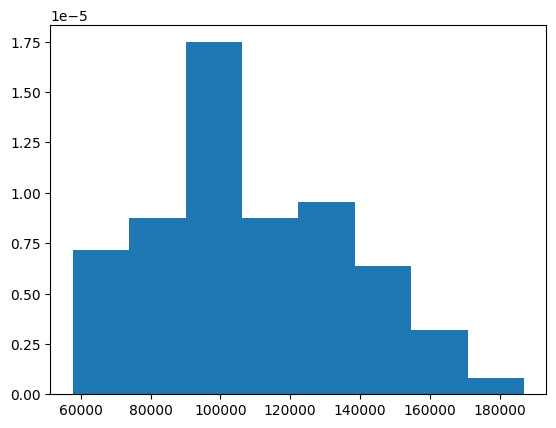

In [105]:
# Use matplotlib to draw a histogram of a salary data
plt.hist(df_new['salary'],bins=8, density=True)

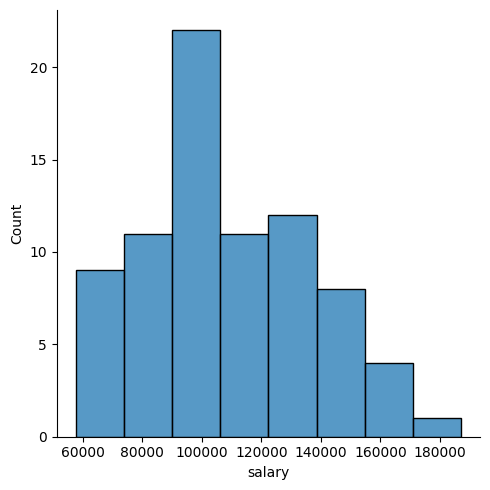

In [106]:
# Use seaborn package to draw a histogram
sns.displot(df_new['salary']);

<Axes: xlabel='rank'>

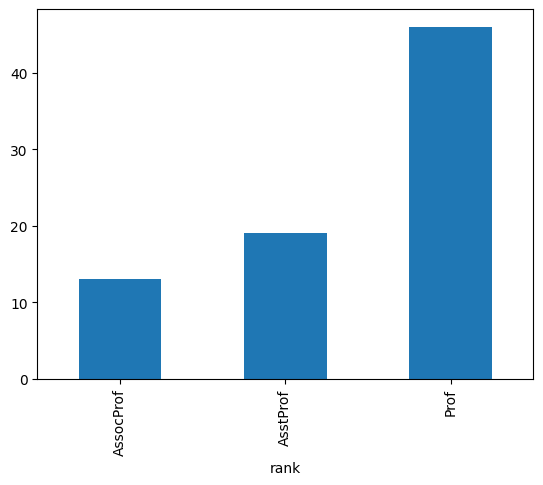

In [107]:
# Use regular matplotlib function to display a barplot
df_new.groupby(['rank'])['salary'].count().plot(kind='bar')

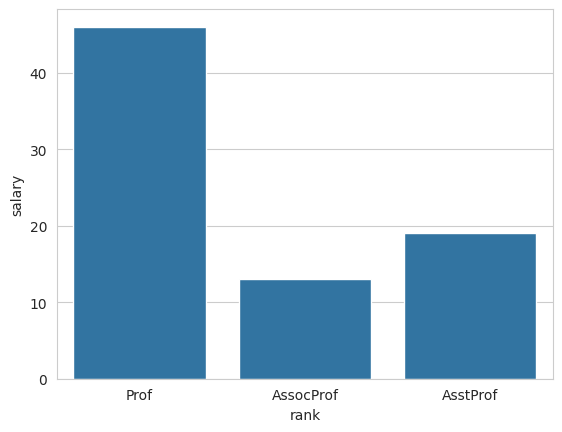

In [108]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")
ax = sns.barplot(x='rank',y ='salary', data=df_new, estimator=len)

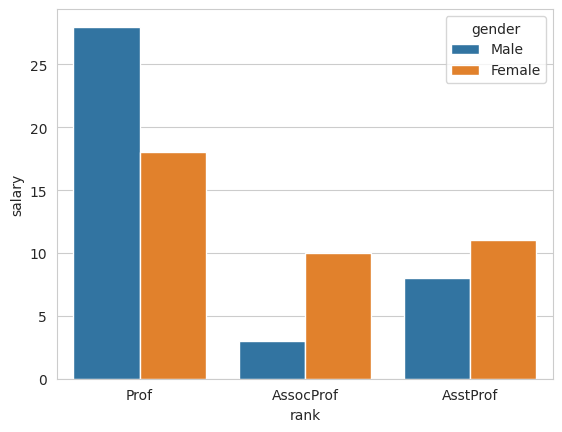

In [109]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='gender', data=df_new, estimator=len)

<Axes: xlabel='salary'>

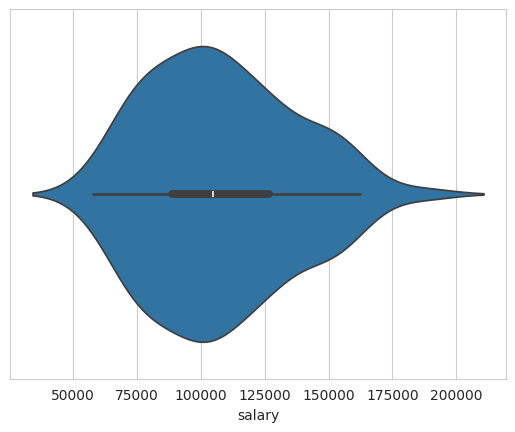

In [110]:
# Violinplot
sns.violinplot(x = "salary", data=df_new)

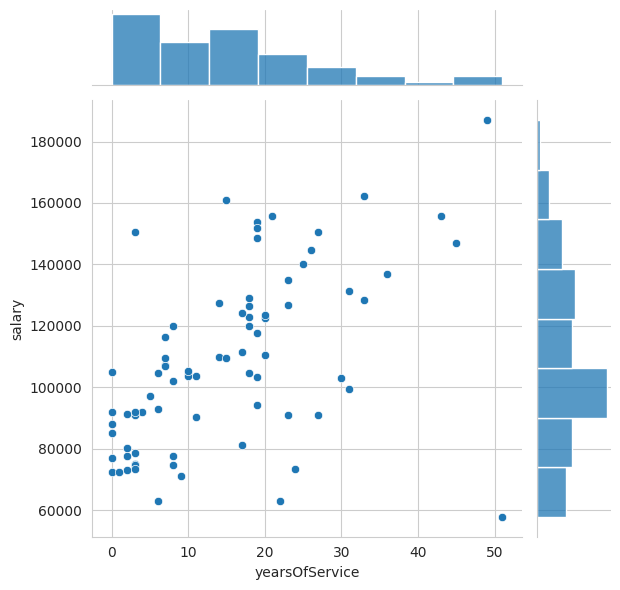

In [111]:
# Scatterplot in seaborn
sns.jointplot(x='yearsOfService', y='salary', data=df_new)

<Axes: xlabel='yearsOfService', ylabel='salary'>

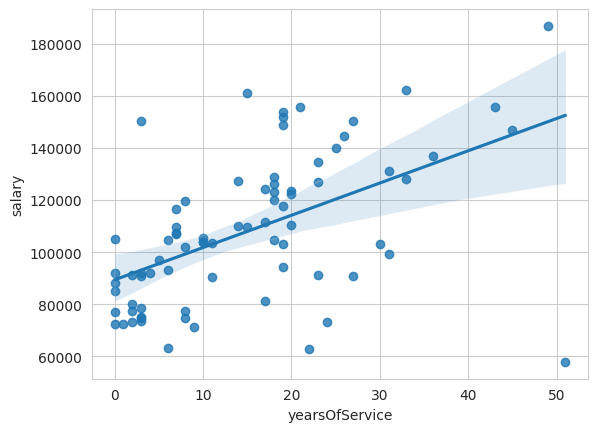

In [112]:
# If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='yearsOfService', y='salary', data=df_new)

<Axes: xlabel='rank', ylabel='salary'>

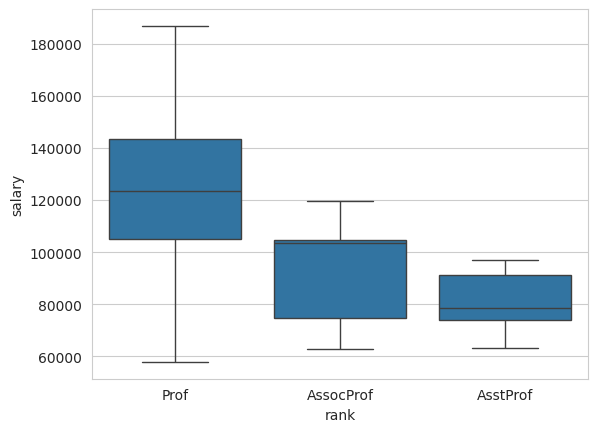

In [113]:
# Box plot
sns.boxplot(x='rank',y='salary', data=df_new)

<Axes: xlabel='rank', ylabel='salary'>

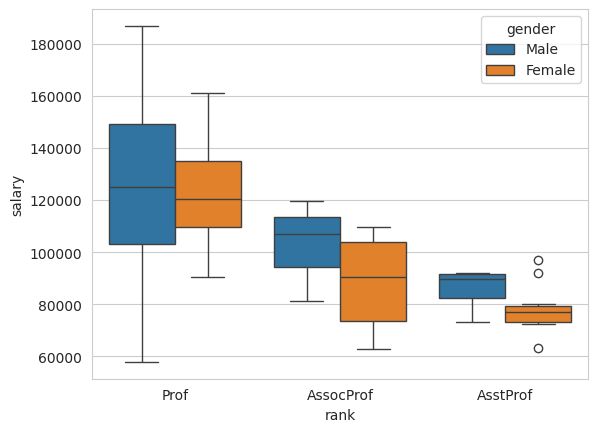

In [114]:
# Side-by-side box plot
sns.boxplot(x='rank', y='salary', data=df_new, hue='gender')

<Axes: xlabel='rank', ylabel='salary'>

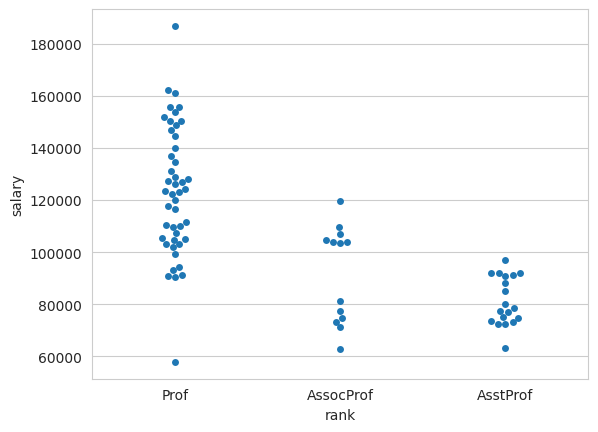

In [115]:
# Swarm plot
sns.swarmplot(x='rank', y='salary', data=df_new)

TypeError: agg function failed [how->mean,dtype->object]

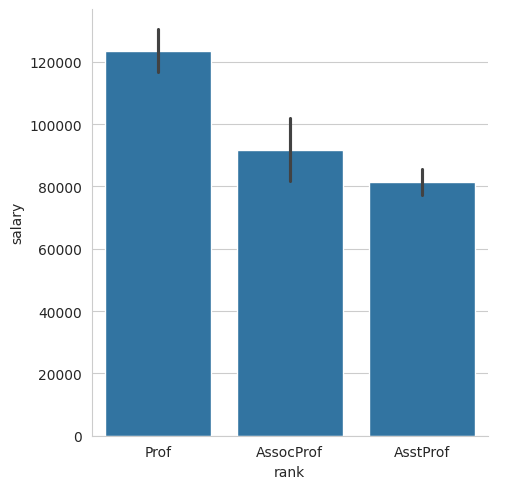

In [118]:
# Factorplot
sns.catplot(x='rank', y='salary', data=df_new, kind='bar')
print(df_new.groupby('rank').mean())

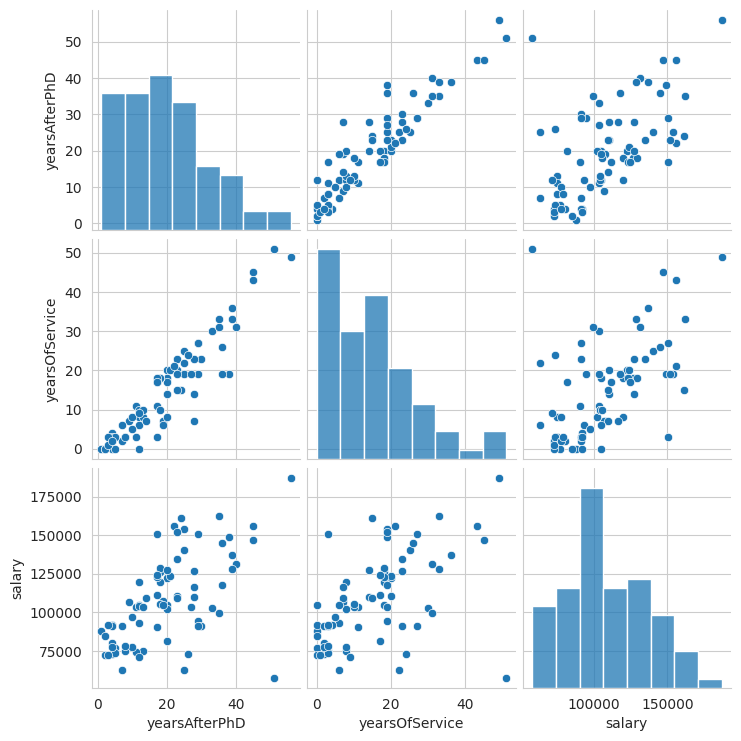

In [119]:
# Pairplot
sns.pairplot(df_new)

### Exercise 7 Graphing data

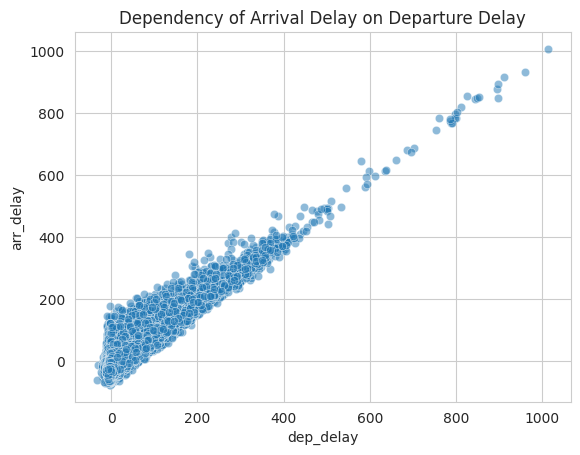

In [120]:
# Use the seaborn package to explore the dependency of arr_delay on dep_delay
# in the flights dataset. You can use a scatterplot or regplot using flight.
#menampilkan regresi plot
sns.scatterplot(data=flights, x="dep_delay", y="arr_delay", alpha=0.5)

# Menambahkan judul
plt.title("Dependency of Arrival Delay on Departure Delay")
plt.show()

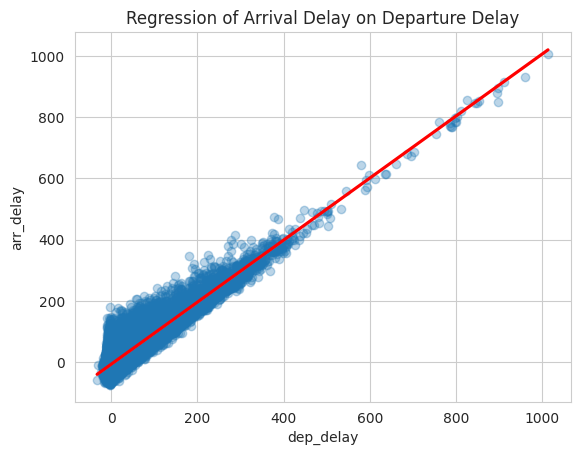

In [121]:
#menampilkan regresi plot

sns.regplot(data=flights, x="dep_delay", y="arr_delay", scatter_kws={'alpha':0.3}, line_kws={"color": "red"})

plt.title("Regression of Arrival Delay on Departure Delay")
plt.show()

## Descriptive statistics
Statistics that are used to describe data. We have seen methods that calculate descriptive statistics before with the DataFrame describe() method.

Descriptive statistics summarize attributes of a sample, such as the min/max values, and the mean (average) of the data. Below is a summary of some additional methods that calculate descriptive statistics.

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [122]:
# Recall the describe() function which computes a subset of the above listed statistics
flights.dep_delay.describe()

,dep_delay
count,158418.000000
mean,9.463773
std,36.545109
min,-33.000000
25%,-5.000000
50%,-2.000000
75%,7.000000
max,1014.000000


In [123]:
# find the index of the maximum or minimum value
# if there are multiple values matching idxmin() and idxmax() will return the first match
flights['dep_delay'].idxmin()  #minimum value

54111

In [124]:
# Count the number of records for each different value in a vector
flights['carrier'].value_counts()

,count
carrier,
UA,58665
DL,48110
AA,32729
US,20536
AS,714


## Inferential Statistics
Use data analysis on a sample of data to infer properties and make predictions that cannot be derived from descriptive statistics. Examples of this could be predicting a new unknown value based on previous data (linear regression, machine learning) or hypothesis testing (such as T-tests).

### Linear Regression
A linear approach to model the relationship between a scalar output and one (or more) input variables. With one input and one output variable you are finding a line of *best fit*. You calculate the slope and y-intercept for a line that minimizes the distance between all the existing data points. You can then use this line to make predictions on unknown data.

In [126]:
# Import Statsmodel functions:
import statsmodels.api as sm

In [127]:
# Create a fitted model
lm = sm.OLS(df_new.yearsOfService, df_new.salary).fit()

# Print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:         yearsOfService   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              183.1
Date:                Fri, 21 Feb 2025   Prob (F-statistic):                    4.78e-22
Time:                        07:26:27   Log-Likelihood:                         -294.05
No. Observations:                  78   AIC:                                      590.1
Df Residuals:                      77   BIC:                                      592.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [129]:
# Print the coefficients
lm.params

,0
salary,0.000145


In [130]:
# Using scikit-learn:
from sklearn import linear_model
est = linear_model.LinearRegression(fit_intercept = True)   # create estimator object
# When you use dataframe columns this fits your model with feature names
est.fit(df_new[['yearsOfService']], df_new[['salary']])

# If you pass the values, you don't have to use feature names
# est.fit(df_new[['yearsOfService']].values, df_new[['salary']].values)

# Print result
print("Coef:", est.coef_, "\nIntercept:", est.intercept_)

# Predict
# When you predict you have to use the features name otherwise you get a warning
pred = est.predict(pd.DataFrame(np.array([21]), columns=['yearsOfService']))

# If you created a model based on values, then you predict with only a value,
# though you have to pass it with the same shape coef_
# pred = est.predict([[21]])
print("Predicted salary: ", pred)


Coef: [[1240.3566535]] 
Intercept: [89354.82421525]
Predicted salary:  [[115402.31393877]]


### Exercise 8 Build a linear model

In [134]:
# stats model for arr_delay and dep_delay
# Create a fitted model
X= flights1[['dep_delay']] #menggunakan data yang sudah tidak terdapat NAN
y= flights1[['arr_delay']]
lm = sm.OLS(x , y).fit()

# Print model summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:              dep_delay   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                          5.114e+05
Date:                Fri, 21 Feb 2025   Prob (F-statistic):                        0.00
Time:                        07:27:55   Log-Likelihood:                     -6.8304e+05
No. Observations:              157927   AIC:                                  1.366e+06
Df Residuals:                  157926   BIC:                                  1.366e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [189]:
# Build a linear model for arr_delay ~ dep_delay
#menggunakan sklearn
lin_model = linear_model.LinearRegression(fit_intercept = False) #agar intercept tidak negatif
lin_model.fit(flights1[['dep_delay']], flights1[['arr_delay']])

# Print model summary
print("linear model summary")
print("Coef:", lin_model.coef_, "\nIntercept:",lin_model.intercept_)
# Predict a value
pred_model = lin_model.predict(flights1[['dep_delay']])
print("Predicted arr_delay: ", pred_model)
r2 = lin_model.score(flights1[['dep_delay']], flights1[['arr_delay']])
print("R-Square:" , r2)

linear model summary
Coef: [[0.96438696]] 
Intercept: 0.0
Predicted arr_delay:  [[ 1.92877392]
 [ 3.85754785]
 [ 1.92877392]
 ...
 [ 0.        ]
 [-6.75070873]
 [77.15095693]]
R-Square: 0.7634410608628274


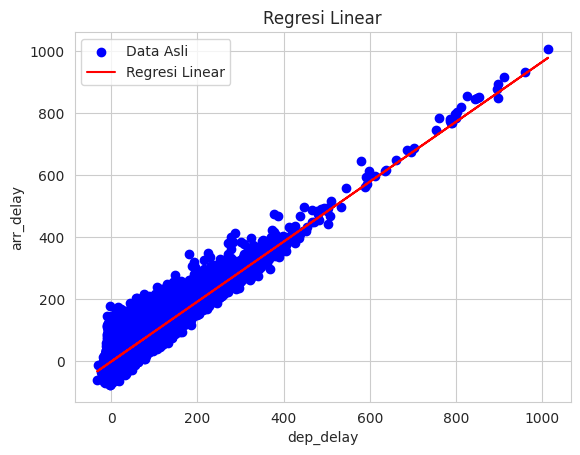

In [184]:
plt.scatter(x, y, color='blue', label='Data Asli')  # Titik data asli
plt.plot(x, pred_model, color='red', label='Regresi Linear')  # Garis regresi
plt.xlabel('dep_delay')
plt.ylabel('arr_delay')
plt.legend()
plt.title('Regresi Linear')
plt.show()